In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Now exploring the data

In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.salary

0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64

# Data PreProcessing

In [7]:
df.salary.fillna(0,inplace=True)

In [8]:
df.salary = df.salary.astype(int)

In [9]:
df['gender'] = df['gender'].replace(("M", "F"),(0,1))
df['ssc_b'] = df['ssc_b'].replace(("Central", "Others"),(0,1))
df['hsc_b'] = df['hsc_b'].replace(("Others", "Central"),(0,1))
df['hsc_s'] = df['hsc_s'].replace(("Commerce", "Science","Arts"),(1,2,3))
df['degree_t'] = df['degree_t'].replace(("Comm&Mgmt", "Sci&Tech","Others"),(3,2,1))
df['workex'] = df['workex'].replace(("No", "Yes"),(0,1))
df['specialisation'] = df['specialisation'].replace(("Mkt&Fin", "Mkt&HR"),(2,1))

In [10]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed,270000
1,2,0,79.33,0,78.33,0,2,77.48,2,1,86.5,2,66.28,Placed,200000
2,3,0,65.00,0,68.00,1,3,64.00,3,0,75.0,2,57.80,Placed,250000
3,4,0,56.00,0,52.00,1,2,52.00,2,0,66.0,1,59.43,Not Placed,0
4,5,0,85.80,0,73.60,1,1,73.30,3,0,96.8,2,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,0,1,77.60,3,0,91.0,2,74.49,Placed,400000
211,212,0,58.00,1,60.00,0,2,72.00,2,0,74.0,2,53.62,Placed,275000
212,213,0,67.00,1,67.00,0,1,73.00,3,1,59.0,2,69.72,Placed,295000
213,214,1,74.00,1,66.00,0,1,58.00,3,0,70.0,1,60.23,Placed,204000


# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

number =LabelEncoder()
df["status"]=number.fit_transform(df["status"].astype('str'))
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,0,1,58.00,2,0,55.0,1,58.80,1,270000
1,2,0,79.33,0,78.33,0,2,77.48,2,1,86.5,2,66.28,1,200000
2,3,0,65.00,0,68.00,1,3,64.00,3,0,75.0,2,57.80,1,250000
3,4,0,56.00,0,52.00,1,2,52.00,2,0,66.0,1,59.43,0,0
4,5,0,85.80,0,73.60,1,1,73.30,3,0,96.8,2,55.50,1,425000


# Plotiing the target variables

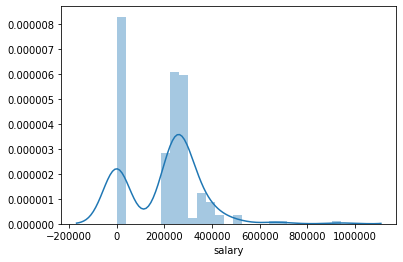

In [14]:
import seaborn as sns
sns.distplot(df.salary, bins = 25) 

# Finding Outlier

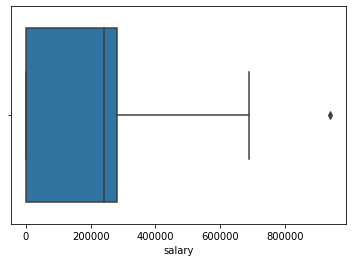

In [15]:
import seaborn as sns
sns.boxplot(df.salary)

# Checking correlation between features

In [16]:
corr_matrix = abs(df.corr())
print(corr_matrix["salary"].sort_values(ascending=False)) 

salary            1.000000
status            0.865774
ssc_p             0.538090
hsc_p             0.452569
degree_p          0.408371
workex            0.298285
specialisation    0.275766
etest_p           0.186988
gender            0.143110
mba_p             0.139823
hsc_s             0.048067
ssc_b             0.034594
degree_t          0.020329
hsc_b             0.011544
sl_no             0.002543
Name: salary, dtype: float64


# Dropping the Irrelavant feature

In [17]:
df = df.drop(['sl_no','hsc_b','degree_t'],axis=1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000
1,0,79.33,0,78.33,2,77.48,1,86.5,2,66.28,1,200000
2,0,65.00,0,68.00,3,64.00,0,75.0,2,57.80,1,250000
3,0,56.00,0,52.00,2,52.00,0,66.0,1,59.43,0,0
4,0,85.80,0,73.60,1,73.30,0,96.8,2,55.50,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,77.60,0,91.0,2,74.49,1,400000
211,0,58.00,1,60.00,2,72.00,0,74.0,2,53.62,1,275000
212,0,67.00,1,67.00,1,73.00,1,59.0,2,69.72,1,295000
213,1,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000


# Now Applying Standard Scala

In [18]:
X= df.drop(['salary'],axis=1)
Y =df.salary

In [19]:
Y

0      270000
1      200000
2      250000
3           0
4      425000
        ...  
210    400000
211    275000
212    295000
213    204000
214         0
Name: salary, Length: 215, dtype: int32

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2, random_state =0)

# Applying Ridge and Lasso Regression

In [22]:
from sklearn.linear_model import Ridge, Lasso 

In [23]:
ls = Lasso(alpha=0.9)
ls.fit(X_train,y_train)
ls.score(X_test,y_test)
train_score = ls.score(X_train,y_train)
test_score = ls.score(X_test,y_test)
print(train_score)
print(test_score)

0.7453178303226344
0.8829588209834225


# Applying hyper parameter tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import uniform

In [25]:
## initialize all parameter
params={'alpha':uniform(0.9)} 

In [26]:
## Randomize search Cv is start
random_search = RandomizedSearchCV(estimator=ls,param_distributions=params,n_iter=500,
                                   scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.9), n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001254BE810C8>},
                   scoring='neg_mean_squared_error', verbose=3)

In [27]:
random_search.best_score_

-6190046165.293376

In [29]:
best_params = random_search.best_params_

# Applying Linear Regressor

In [30]:
from sklearn.linear_model import Lasso
regressior = Lasso(**best_params)
regressior.fit(X_train, y_train)

Lasso(alpha=1.8992145945340688)

In [31]:
train_score = regressior.score(X_train,y_train)
test_score = regressior.score(X_test,y_test)
print(train_score)
print(test_score)

0.745317827225545
0.8829712662383618


In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred = regressior.predict(X_test)


print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

RMSE :  46114.21230628823
Mean Absolute Error 34290.63111481874


# Applying Adaboost Regressor

In [50]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor().fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)

train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print("Score of Training:",train_score)
print("Score of Testing:",test_score)

Score of Training: 0.9138527542638003
Score of Testing: 0.8662466048996186


In [44]:
params={
    "n_estimators":[100,200,300,400,500],
"learning_rate" : [0.01,0.001,0.002] }
## Apply desire model for tuning
classifier= AdaBoostRegressor()
## Randomize search Cv is start
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter
=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)
## Calculate The Score and best params
print('mse: {:.4}, with best C: {}'.format(random_search.best_score_,
random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
mse: -5.787e+09, with best C: {'n_estimators': 500, 'learning_rate': 0.01}


In [49]:
best_params = random_search.best_params_
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(**best_params).fit(X_train,y_train)
#Predicting the Test set results
y_pred = abr.predict(X_train)

train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print("Score of Training:",train_score)
print("Score of Testing:",test_score)

Score of Training: 0.8780338043748822
Score of Testing: 0.9047293862475442


# Applying GradientBoosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
abr = GradientBoostingRegressor().fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)

train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print("Score of Training:",train_score)
print("Score of Testing:",test_score)

Score of Training: 0.9748416924321142
Score of Testing: 0.9080960685530508


In [42]:
params={
    "n_estimators":[100,200,300,400,500],
"learning_rate" : [0.01,0.001,0.002],
 "min_samples_leaf":[1,2,3,4,5],
"max_depth":[50,60,70,80,90,100]}
## Apply desire model for tuning
regressor= GradientBoostingRegressor()
## Randomize search Cv is start
random_search = RandomizedSearchCV (regressor,param_distributions=params,n_iter
=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)
## Calculate The Score and best params
print('mse: {:.4}, with best C: {}'.format(random_search.best_score_,
random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
mse: -6.424e+09, with best C: {'n_estimators': 400, 'min_samples_leaf': 4, 'max_depth': 100, 'learning_rate': 0.01}


In [52]:
params = random_search.best_params_
from sklearn.ensemble import GradientBoostingRegressor
abr = GradientBoostingRegressor(**params).fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)

train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print("Score of Training:",train_score)
print("Score of Testing:",test_score)

Score of Training: 0.9304189230457238
Score of Testing: 0.9078892091636713


In [32]:
print("\U0001F600","THANK-YOU","\U0001F917")

😀 THANK-YOU 🤗
